In [56]:
# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

In [2]:
# Tentukan jalur dataset
train_dir = r'C:\Users\HP-GK\Kompor CNN\train'
val_dir = r'C:\Users\HP-GK\Kompor CNN\val'
test_dir = r'C:\Users\HP-GK\Kompor CNN\test'

In [3]:
# Pra-pemrosesan data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Muat data train, validation, dan test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary')

Found 252 images belonging to 2 classes.
Found 54 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [9]:
model = keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Karena hanya ada 2 kelas, gunakan sigmoid sebagai aktivasi output layer
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [11]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Latih model dengan data train dan evaluasi dengan data validation
model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
32/32 [==============================] - 51s 2s/step - loss: 0.4998 - accuracy: 0.8175 - val_loss: 0.3742 - val_accuracy: 0.8333
Epoch 2/10
32/32 [==============================] - 45s 1s/step - loss: 0.4343 - accuracy: 0.8333 - val_loss: 0.3782 - val_accuracy: 0.8333
Epoch 3/10
32/32 [==============================] - 42s 1s/step - loss: 0.4199 - accuracy: 0.8333 - val_loss: 0.3874 - val_accuracy: 0.8333
Epoch 4/10
32/32 [==============================] - 44s 1s/step - loss: 0.3632 - accuracy: 0.8333 - val_loss: 0.3671 - val_accuracy: 0.8333
Epoch 5/10
32/32 [==============================] - 43s 1s/step - loss: 0.3251 - accuracy: 0.8413 - val_loss: 0.3260 - val_accuracy: 0.8333
Epoch 6/10
32/32 [==============================] - 43s 1s/step - loss: 0.3044 - accuracy: 0.8532 - val_loss: 0.3043 - val_accuracy: 0.8519
Epoch 7/10
32/32 [==============================] - 43s 1s/step - loss: 0.2895 - accuracy: 0.8571 - val_loss: 0.2873 - val_accuracy: 0.8333
Epoch 8/10
32/32 [==

In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

7/7 [==============================] - 8s 1s/step - loss: 0.4575 - accuracy: 0.8704
Test Loss: 0.4575080871582031
Test Accuracy: 0.8703703880310059


In [15]:
# Prediksi label dari data test
test_images, test_labels = test_generator.next()
predicted_labels = model.predict(test_images)
predicted_labels = np.round(predicted_labels).flatten()

1/1 [==============================] - 0s 295ms/step


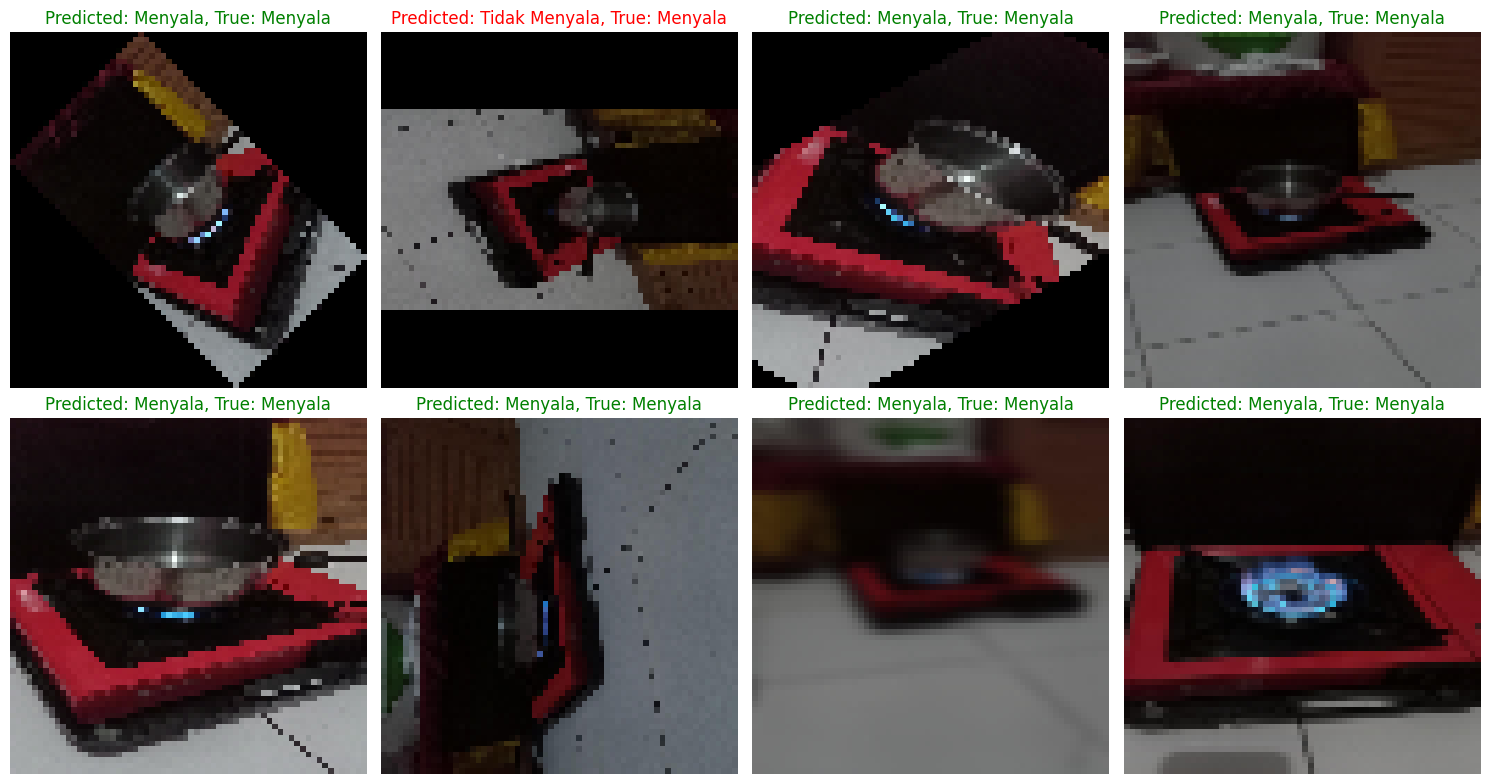

In [28]:
# Tampilkan gambar dan label dari data test
plt.figure(figsize=(15,8))
num_images = test_images.shape[0]
for i in range(num_images):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(test_images[i])
    if predicted_labels[i] == test_labels[i]:
        color = 'green'
        label = 'Correct'
    else:
        color = 'red'
        label = 'Incorrect'
    
    # Ubah nilai label menjadi "Menyala" atau "Tidak Menyala"
    true_label = "Menyala" if test_labels[i] == 0.0 else "Tidak Menyala"
    pred_label = "Menyala" if predicted_labels[i] == 0.0 else "Tidak Menyala"
    
    ax.set_title(f"Predicted: {pred_label}, True: {true_label}", color=color)
    ax.axis("off")
plt.tight_layout()
plt.show()


In [47]:
# Buat confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

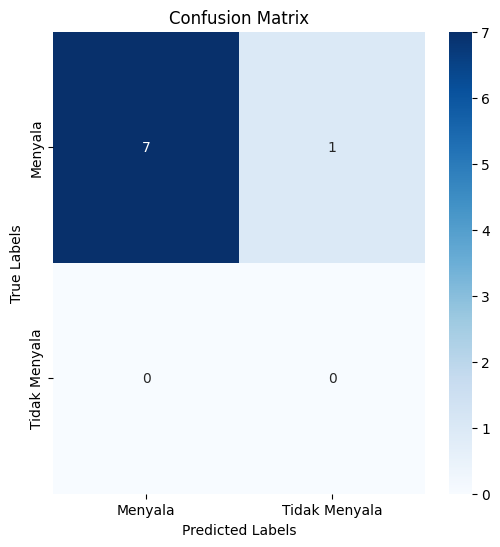

In [48]:
# Tampilkan confusion matrix dengan seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Menyala', 'Tidak Menyala'], yticklabels=['Menyala', 'Tidak Menyala'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [50]:
# Ubah nilai aktual dan prediksi menjadi kategori "Menyala" dan "Tidak Menyala"
test_labels_cat = ['Menyala' if label == 0 else 'Tidak Menyala' for label in test_labels]
predicted_labels_cat = ['Menyala' if label == 0 else 'Tidak Menyala' for label in predicted_labels]

In [54]:
# Tampilkan ringkasan akurasi, presisi, dan f1-score
report = classification_report(test_labels_cat, predicted_labels_cat)
print("Classification Report:")
print(report)

Classification Report:
               precision    recall  f1-score   support

      Menyala       1.00      0.88      0.93         8
Tidak Menyala       0.00      0.00      0.00         0

     accuracy                           0.88         8
    macro avg       0.50      0.44      0.47         8
 weighted avg       1.00      0.88      0.93         8



C:\Users\HP-GK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP-GK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP-GK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetri

In [55]:
# Simpan model ke dalam file
model.save("model.h5")
print("Model telah disimpan.")

Model telah disimpan.


In [57]:
# Konversi model ke JSON
model_json = model.to_json()

In [58]:
# Tulis model JSON ke file
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Model telah disimpan dalam bentuk JSON.")

Model telah disimpan dalam bentuk JSON.
